# Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
def renaming(df):
    #removing special characters & following the snake case
    
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    #df.columns = df.columns.str.replace('#_','')
    return df.info()

In [4]:
renaming(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

### 1. Get the numerical variables from our dataset.

In [5]:
df_numerical = df.select_dtypes(np.number)
df_numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [6]:
def distribution(df):
    for col in df_numerical:
        sns.distplot(df_numerical[col])
        plt.show()

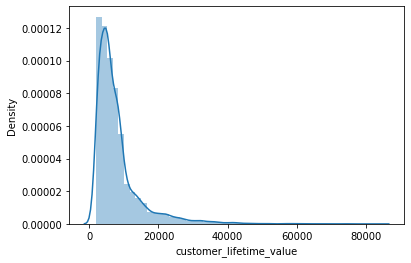

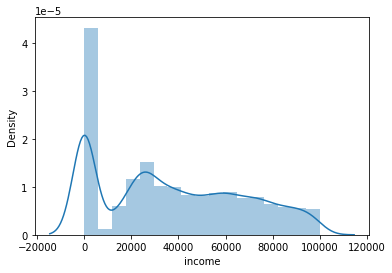

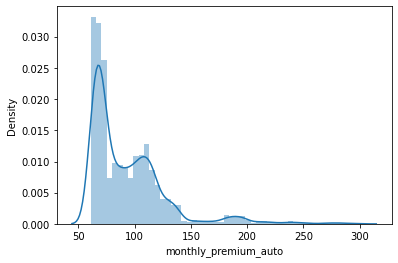

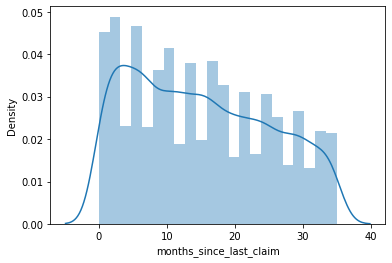

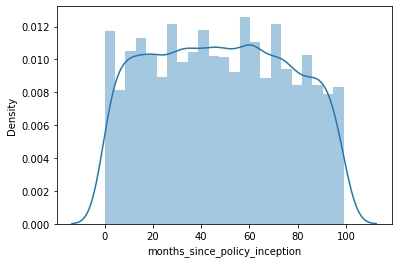

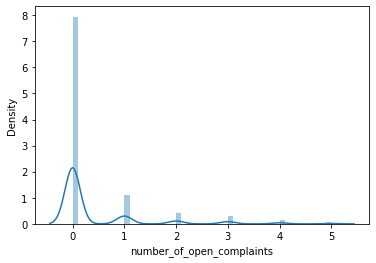

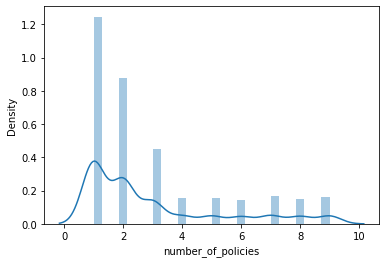

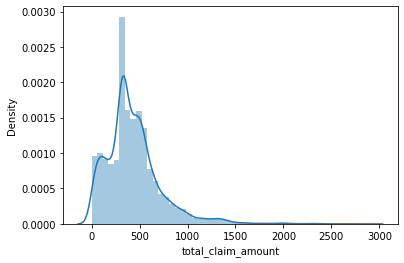

In [7]:
distribution(df_numerical)

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [8]:
# create copies for the different runs
df_numerical1 = df_numerical.copy()
df_numerical2 = df_numerical.copy() 
df_numerical3 = df_numerical.copy()
df_numerical4 = df_numerical.copy()

**BoxCox transformation**

In [9]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [10]:
df_numerical1, _ci = boxcox_transform(df_numerical1)
df_numerical1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154
...,...,...,...,...,...,...,...,...
9129,2.801170,1448.531450,0.685461,7.347815,33.090025,0.648045,0.607328,23.588905
9130,2.711030,697.790558,0.685606,6.134207,13.709541,0.648045,0.000000,32.792951
9131,2.762062,1167.961720,0.685725,4.379465,17.034934,1.176115,0.607328,47.263726
9132,2.758397,704.383672,0.685898,11.319628,1.667871,0.648045,0.893486,44.225147


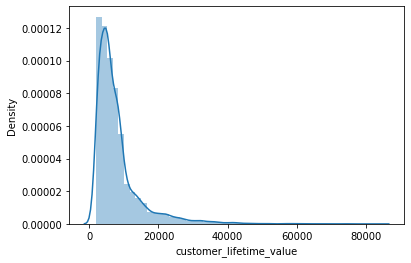

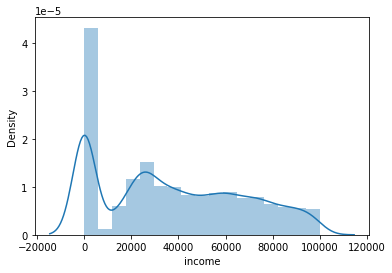

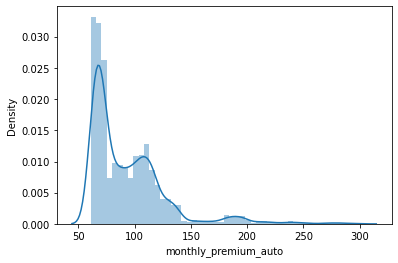

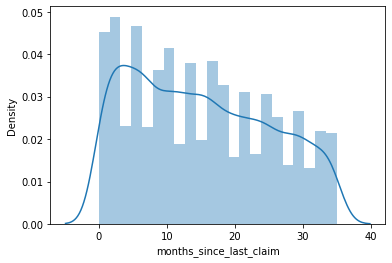

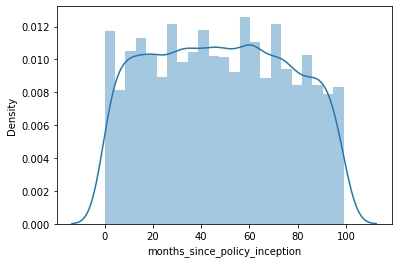

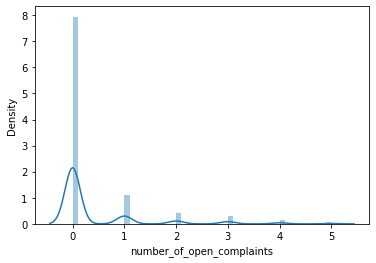

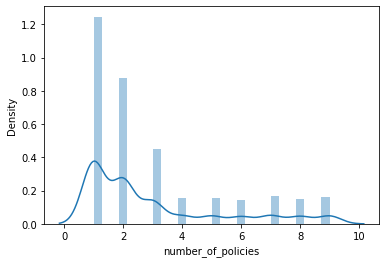

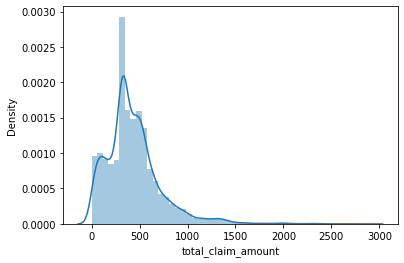

In [11]:
distribution(df_numerical1)

**Log transformation**

In [12]:
  def log_transform(x):
    x = np.log(x)
    if np.isfinite(x):
        return np.log(x)
    else:
        return np.NAN

In [13]:
for col in df_numerical2:
    df_numerical2[col] = df_numerical2[col].apply(log_transform)
    df_numerical2[col] = df_numerical2[col].fillna(np.mean(df_numerical2[col]))

df_numerical2.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.069929,2.392242,1.443172,1.242925,0.475885,-inf,-inf,1.783854
1,2.180501,2.368380,1.513652,0.941939,1.318462,-inf,0.732099,1.950367
2,2.247496,2.379065,1.543753,1.061385,1.291320,-inf,-0.366513,1.846789
3,2.190750,2.368380,1.539753,1.061385,1.428968,-inf,0.665730,1.836199
4,2.072197,2.369141,1.456394,0.910235,1.330832,-inf,-inf,1.594974


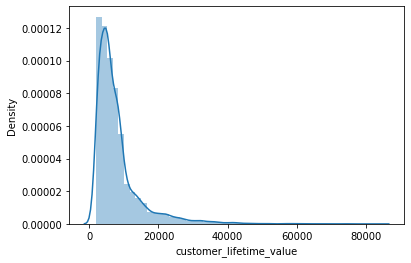

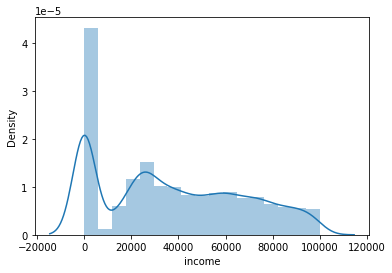

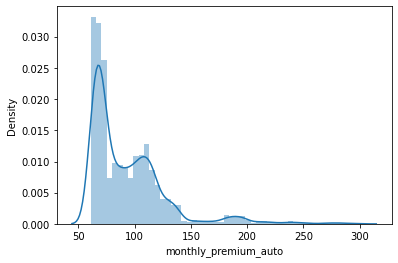

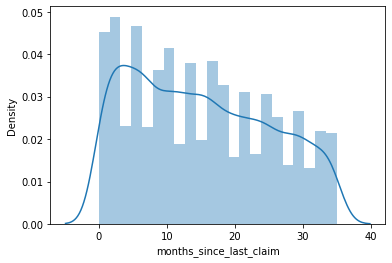

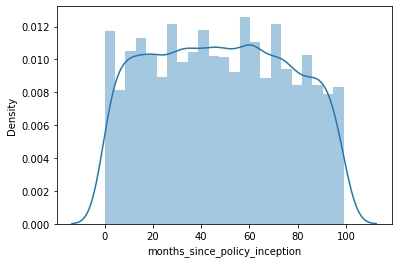

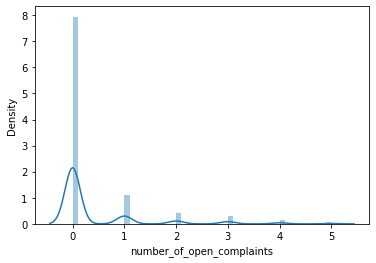

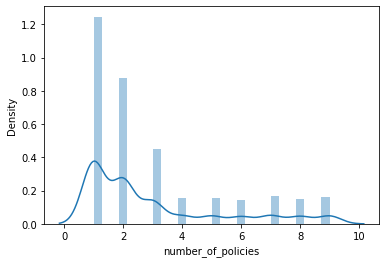

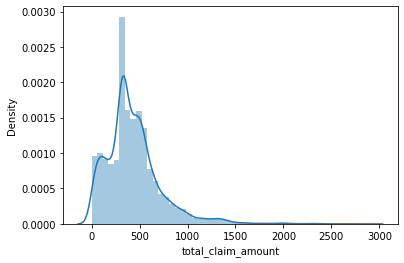

In [14]:
distribution(df_numerical2)

**Standard-Scaler**

In [15]:
df_numerical3.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [16]:
transformer = StandardScaler()
transformer.fit(df_numerical3)

num_stand = transformer.transform(df_numerical3)
num_stand

num_st = pd.DataFrame(num_stand, columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'] )

In [17]:
num_st.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


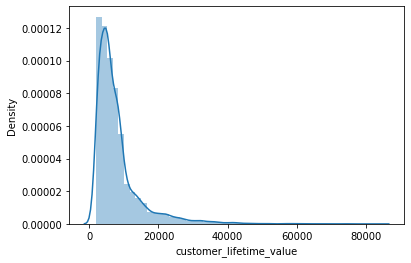

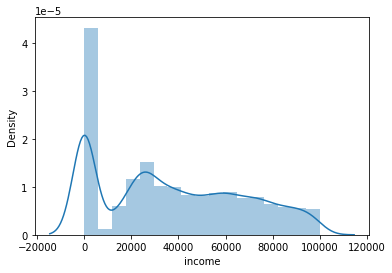

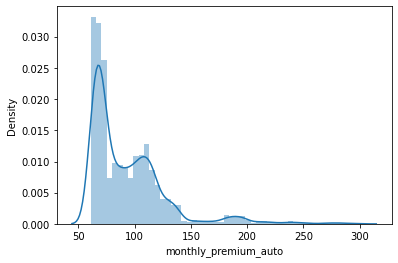

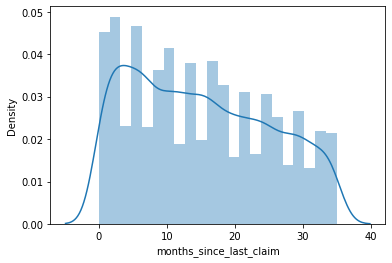

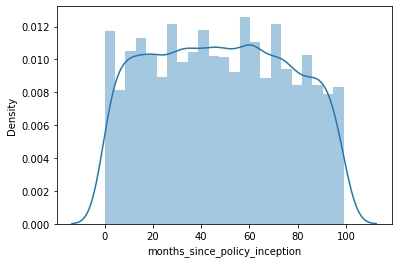

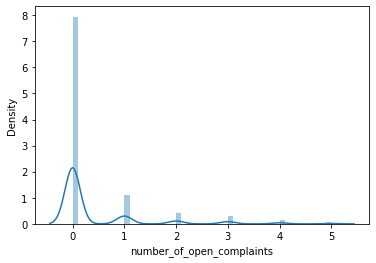

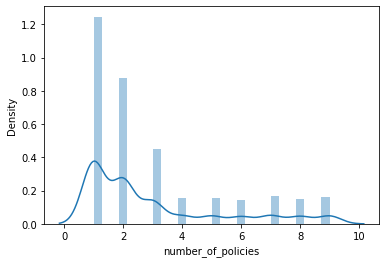

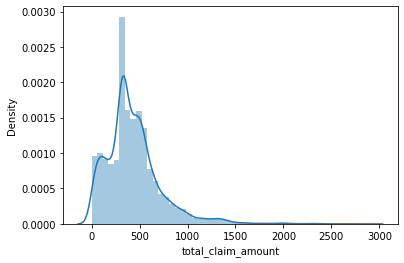

In [18]:
distribution(num_st)

**Normalizer**

In [19]:
df_numerical4.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [20]:
transformer = Normalizer()
transformer.fit(df_numerical4)

transformer = Normalizer()
transformer.fit(df_numerical4)

num_normalized = transformer.transform(df_numerical4)
num_normalized

num_norm = pd.DataFrame(num_normalized, columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'])

num_norm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


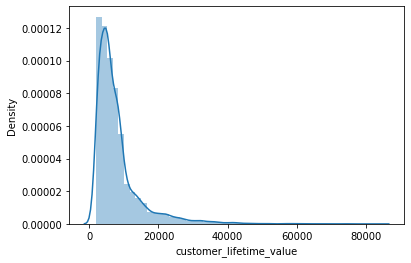

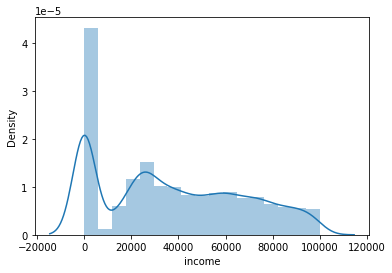

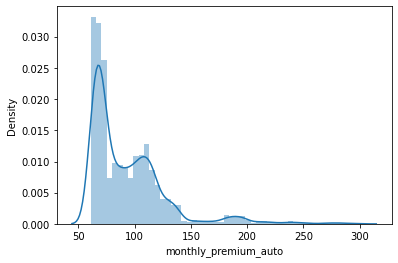

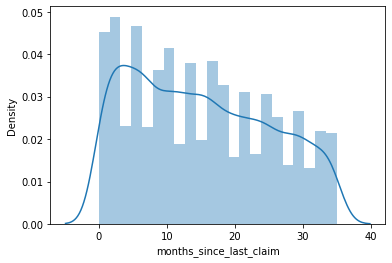

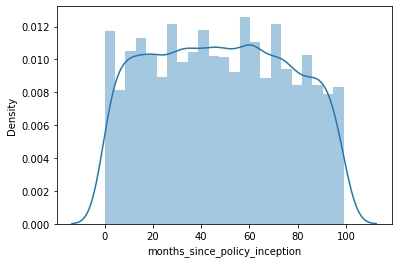

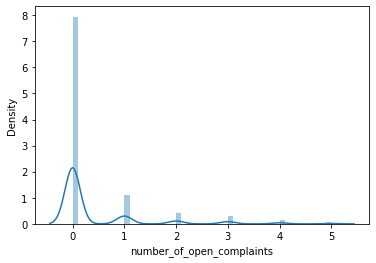

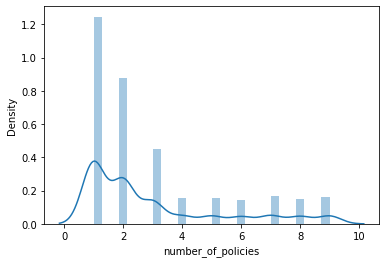

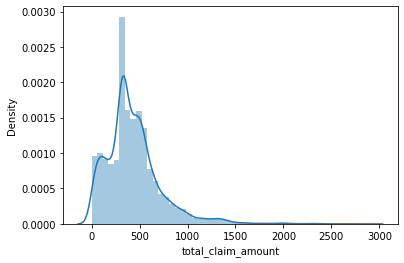

In [21]:
distribution(num_norm)

**Conclusion**

The distribution tends to be more normal with box cox transformation.

It is improved also with the log-transformation

But we do not notice so much changes with the scaling methods.